In [1]:
# Se importan librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se cargan los datos (como se vio en los descriptivos, los datos vienen limpios)
df = pd.read_csv("/Users/sergiopinzon/Documents/GitHub/Proyecto-Final-Clustering-del-Desarrollo-Paises/Datos/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Se realiza el Análisis de Componentes principales, conservando el número de componentes que explica al menos el 90% de la varianza.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_est = StandardScaler().fit_transform(df.iloc[:,1:])
pca_estimator = PCA(n_components=5)
pca_estimator.fit(df_est)
print("Varianza Explicada por 5 componentes: {}%".format(pca_estimator.explained_variance_ratio_.sum()*100))
pca_data = pd.DataFrame(pca_estimator.transform(df_est))

Varianza Explicada por 5 componentes: 94.53099756439512%


Elección de Clusters para K-Medias:


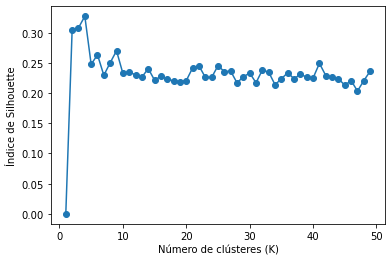

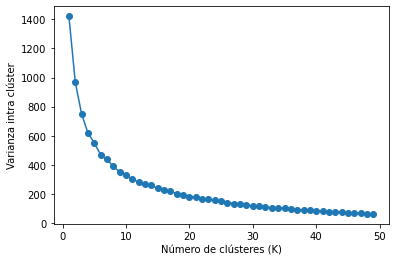

Elección de Clusters para K-Medoides:


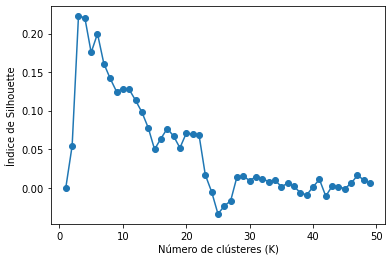

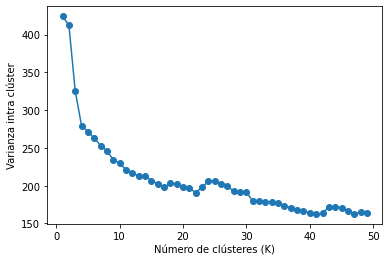

In [4]:
# Se grafican los coeficientes de silhouette y los elbow plots para elegir el número de clusters en K-Medias y K-Medoides
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_score
print("Elección de Clusters para K-Medias:")
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 50):
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(pca_data)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(pca_data, kmeans.labels_)
    except:
        silhouette = 0
    silhouettes.append(silhouette)
plt.plot(range(1, 50), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

plt.plot(range(1, 50), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

print("Elección de Clusters para K-Medoides:")
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 50):
    kmedoids = KMedoids(n_clusters = k, random_state = 123).fit(pca_data)
    varianza_intra_cluster.append(kmedoids.inertia_)
    try:
        silhouette = silhouette_score(pca_data, kmedoids.labels_)
    except:
        silhouette = 0
    silhouettes.append(silhouette)
plt.plot(range(1, 50), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

plt.plot(range(1, 50), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

In [5]:
from sklearn.metrics import accuracy_score
inert = []
for e in range(1,30):
    kmeans = KMeans(n_clusters = 10, random_state = e).fit(pca_data)
    inert.append(kmeans.inertia_)
    kmeans = kmeans.predict(pca_data)
print("\nDescriptivos sobre la inercia de los modelos de K-Medias sobre los datos resultado del PCA:")
print(pd.DataFrame(inert).describe())
kmeans = KMeans(n_clusters = 10, random_state = 18).fit_predict(pca_data) # Se elige el estado aleatorio 18 por ser el que menos varianza intra_cluster muestra
df['Cluster'] = kmeans
clusters_lst = []
for cluster in df['Cluster'].unique():
    clusterls = []
    for entry in df.iterrows():
        if entry[1]['Cluster'] == cluster:
            clusterls.append(entry[1]['country'])
    clusters_lst.append(clusterls)
print("\nPaises por Cluster de acuerdo con los 10 clusters en K-Medias:")
print(pd.DataFrame(clusters_lst).T.rename(columns={0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4',4:'Cluster 5',5:'Cluster 6',6:'Cluster 7',7:'Cluster 8',8:'Cluster 9',9:'Cluster 10'}))
df['Cluster'] = df['Cluster'].replace({0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4',4:'Cluster 5',5:'Cluster 6',6:'Cluster 7',7:'Cluster 8',8:'Cluster 9',9:'Cluster 10'})
for e in df.columns:
    if e not in ['country', 'Cluster']:
        print("\nDescriptivos por cluster para {}:".format(e))
        print(df.groupby('Cluster')[e].describe().round(2))


Descriptivos sobre la inercia de los modelos de K-Medias sobre los datos resultado del PCA:
                0
count   29.000000
mean   328.173523
std      2.951425
min    324.441515
25%    326.495104
50%    327.473687
75%    329.135747
max    338.784351

Paises por Cluster de acuerdo con los 10 clusters en K-Medias:
                   Cluster 1               Cluster 2   Cluster 3  \
0                Afghanistan                 Albania     Algeria   
1                     Angola                 Armenia   Argentina   
2                      Benin                 Bahamas  Azerbaijan   
3               Burkina Faso                Barbados  Bangladesh   
4                   Cameroon  Bosnia and Herzegovina       Egypt   
5   Central African Republic                  Brazil     Eritrea   
6                       Chad                Bulgaria       Gabon   
7                    Comoros                   Chile       India   
8           Congo, Dem. Rep.                   China   Indonesia   
9

K-medoides

In [6]:
df_final= df.set_index("country")

In [7]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Cluster 6
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Cluster 3
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Cluster 7
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Cluster 6
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Cluster 4


In [8]:
Dos_medoides = KMedoids(n_clusters = 10, random_state = 0).fit_predict(df_final)

ValueError: could not convert string to float: 'Cluster 6'

In [9]:
df_final["cluster"]=Dos_medoides

NameError: name 'Dos_medoides' is not defined

In [10]:
df_final.groupby("cluster").describe()

KeyError: 'cluster'

In [11]:
for e in df_final.columns:
    if e not in ['country', 'cluster']:
        print("\nDescriptivos por cluster para {}:".format(e))
        print(df_final.groupby('cluster')[e].describe().round(2))


Descriptivos por cluster para child_mort:


KeyError: 'cluster'

# CLUSTER JERARQUICO

In [12]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Cluster 6
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Cluster 3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Cluster 7
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Cluster 6
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Cluster 2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Cluster 7
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Cluster 4
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Cluster 7


In [13]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [16]:
df["id"] = df.index + 1


In [21]:
X= df.drop('country',axis=1)

In [24]:
data= X.drop('Cluster',axis=1)

In [25]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,id
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,163
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,164
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,165
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,166


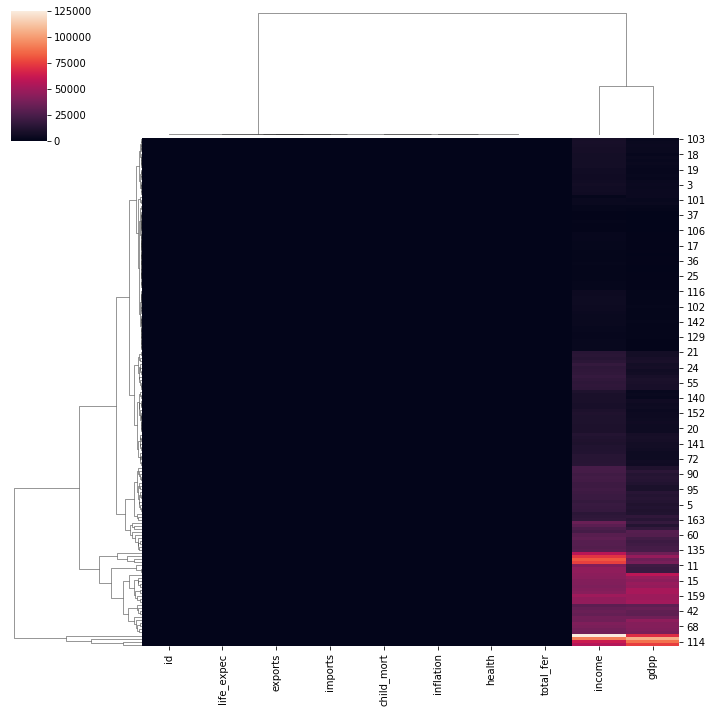

In [26]:
sns.clustermap(data)

In [34]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import numpy as np

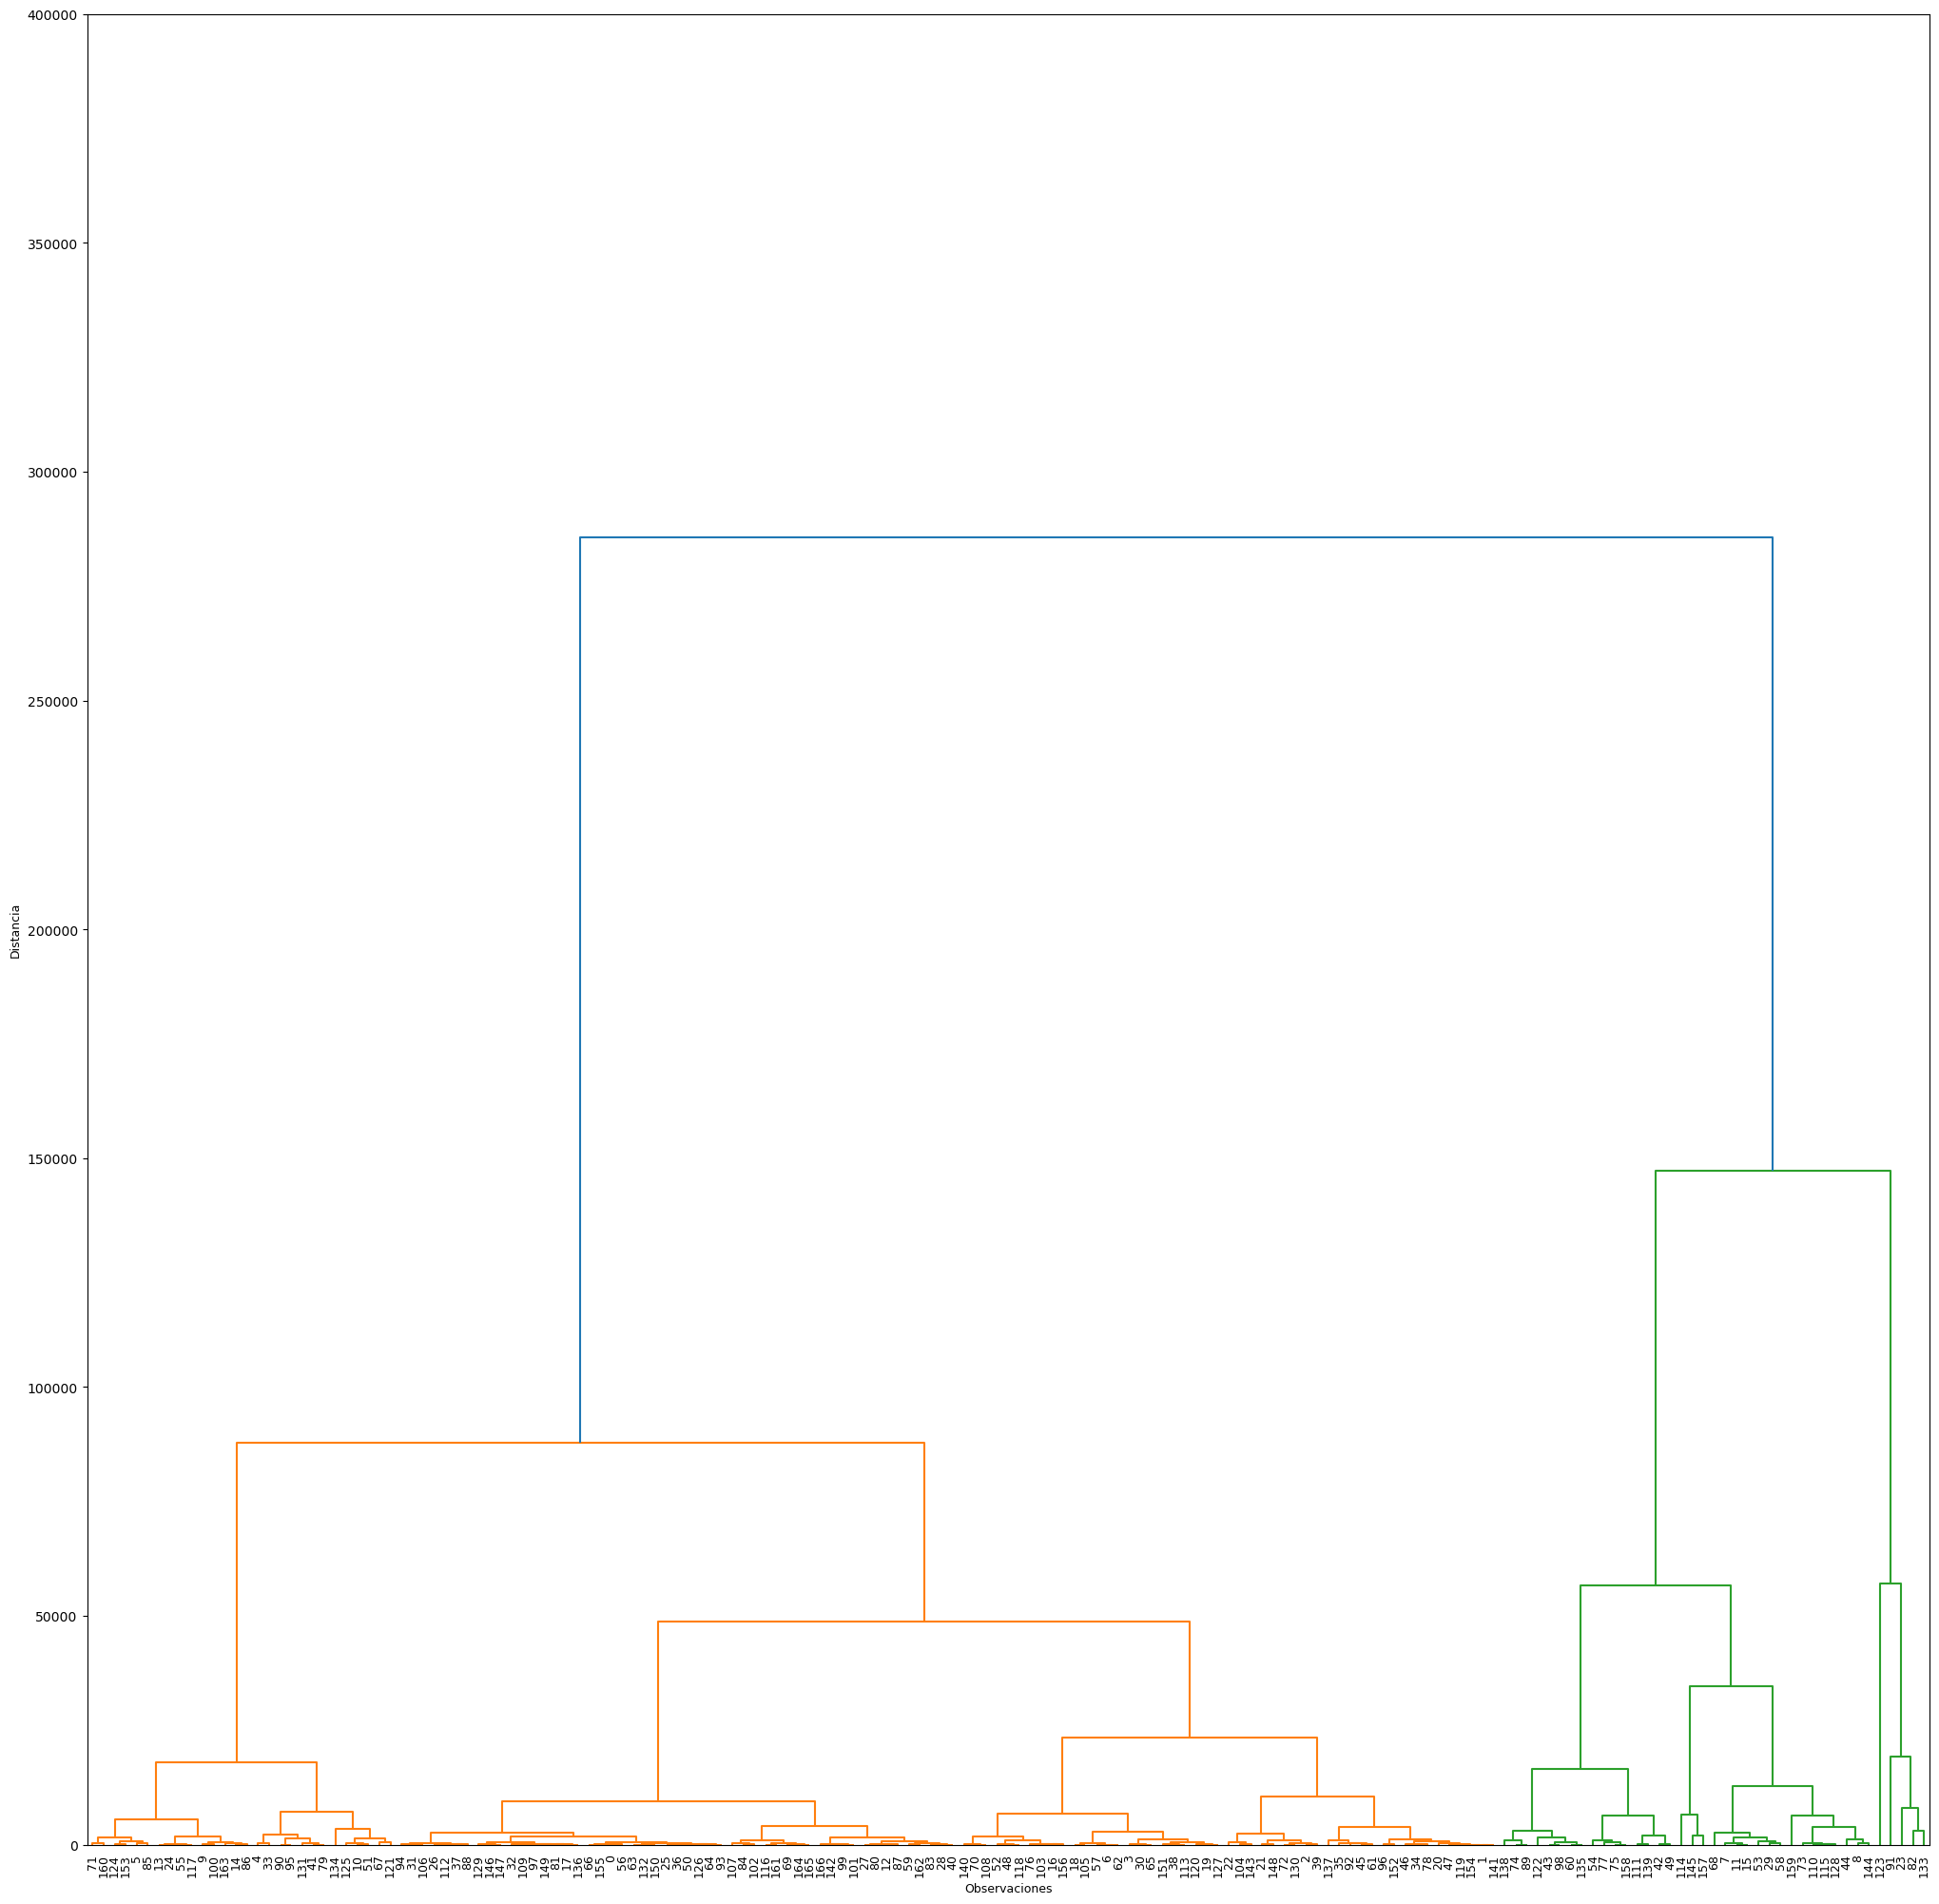

In [35]:
matplotlib.rc_file_defaults()
X = data[['income', 'health']].to_numpy()
dist = pdist(X, metric='euclidean')
Z = linkage(dist, method='ward')

fig, ax = plt.subplots(figsize=(25, 25))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=9, ax=ax)
ax.set_xlabel('Observaciones', fontsize=9)
ax.set_yticks(np.arange(0, 450_000, 50_000))
ax.set_ylabel('Distancia', fontsize=9)
plt.show()

Fijando la distancia en 80

In [41]:
cluster = AgglomerativeClustering(n_clusters=None,
                                  affinity='euclidean',
                                  linkage='ward',
                                  compute_full_tree=True,
                                  distance_threshold=80_000)

cluster.fit_predict(X)

print(f"Clusters a conformar = {cluster.n_clusters_}")



Clusters a conformar = 4


In [42]:
cluster_sk = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_sk = cluster_sk.fit_predict(X)

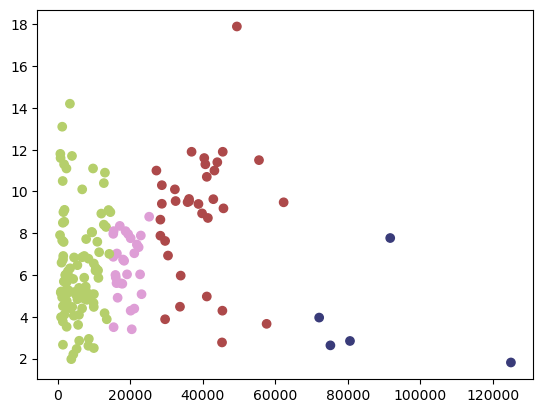

In [43]:
matplotlib.rc_file_defaults()
plt.scatter(X[:,0], X[:,1], c=cluster_sk, cmap='tab20b')
plt.show()